In [77]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
path = "/home/manat/projects/CScorer/work/dev/data/data.duckdb"


In [ ]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_citizen""" ).df()
df = df.drop(columns= 'geom')
con.close()

In [79]:
df.head()

,gbifID,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,...,recordedBy,coordinateUncertaintyInMeters,decimalLatitude,decimalLongitude,issue,url,description,num_identification_agreements,num_identification_disagreements,image_url
0,4512409417,https://www.inaturalist.org/observations/19685...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Polypodiopsida,Equisetales,Equisetaceae,Equisetum,Equisetum scirpoides,...,flanglois,8.0,45.587989,-72.006672,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/19685...,0,2,0,https://inaturalist-open-data.s3.amazonaws.com...
1,4516648549,https://www.inaturalist.org/observations/19699...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Fagales,Betulaceae,Carpinus,Carpinus caroliniana,...,Jacques Ranger,NaN,45.389975,-73.347298,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/19699...,0,2,0,https://inaturalist-open-data.s3.amazonaws.com...
2,4516399205,https://www.inaturalist.org/observations/19699...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Fagales,Juglandaceae,Carya,Carya ovata,...,Jacques Ranger,NaN,45.390855,-73.347612,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/19699...,0,3,0,https://inaturalist-open-data.s3.amazonaws.com...
3,4516777526,https://www.inaturalist.org/observations/19699...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Myrtales,Onagraceae,Epilobium,Epilobium hirsutum,...,Jacques Ranger,NaN,45.388002,-73.347730,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/19699...,0,1,0,https://inaturalist-open-data.s3.amazonaws.com...
4,4516546740,https://www.inaturalist.org/observations/19699...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Brassicales,Brassicaceae,Erysimum,Erysimum hieraciifolium,...,Jacques Ranger,NaN,45.387940,-73.347913,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/19699...,0,2,0,https://inaturalist-open-data.s3.amazonaws.com...


In [80]:
df.shape


(74289, 27)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74289 entries, 0 to 74288
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            74289 non-null  int64  
 1   occurrenceID                      74289 non-null  object 
 2   publishingOrgKey                  74289 non-null  object 
 3   kingdom                           74289 non-null  object 
 4   phylum                            74289 non-null  object 
 5   class                             74289 non-null  object 
 6   order                             74289 non-null  object 
 7   family                            74289 non-null  object 
 8   genus                             74287 non-null  object 
 9   species                           74071 non-null  object 
 10  taxonRank                         74289 non-null  object 
 11  taxonKey                          74289 non-null  int64  
 12  scie

In [82]:
df.describe()

,gbifID,taxonKey,day,month,year,coordinateUncertaintyInMeters,decimalLatitude,decimalLongitude,description,num_identification_agreements,num_identification_disagreements
count,7.428900e+04,7.428900e+04,74289.000000,74289.000000,74289.000000,57818.000000,74289.000000,74289.000000,74289.000000,74289.000000,74289.000000
mean,4.380144e+09,4.067714e+06,15.604760,6.813970,2022.509079,56.528192,45.492599,-72.582821,0.145203,1.315565,0.006205
std,9.892266e+08,1.811197e+06,8.932898,1.967206,2.613744,126.831552,0.345308,0.772900,0.352308,0.611242,0.080059
min,8.910220e+08,2.407000e+03,1.000000,1.000000,2011.000000,1.000000,45.014886,-74.503593,0.000000,0.000000,0.000000
25%,3.860073e+09,2.888353e+06,8.000000,5.000000,2021.000000,5.000000,45.318324,-73.265922,0.000000,1.000000,0.000000
50%,4.851798e+09,3.118274e+06,15.000000,7.000000,2023.000000,10.000000,45.420482,-72.683436,0.000000,1.000000,0.000000
75%,5.134607e+09,5.334192e+06,23.000000,8.000000,2025.000000,33.000000,45.560744,-71.953711,0.000000,2.000000,0.000000
max,5.868425e+09,1.220746e+07,31.000000,12.000000,2025.000000,999.000000,46.817932,-70.230866,1.000000,7.000000,2.000000


In [83]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,eventDate,recordedBy,issue,url,image_url
count,74289,74289,74289,74289,74289,74289,74289,74287,74071,74289,74289,74289,74289,74289,74289,74289
unique,74286,2,1,1,6,48,143,613,1525,6,1702,68664,3318,10,74286,74221
top,https://www.inaturalist.org/observations/53731259,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Onoclea sensibilis L.,2014-08-10,Vincent Laurie,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/53731259,https://inaturalist-open-data.s3.amazonaws.com...
freq,2,74286,74289,74289,52792,8393,8050,3100,1190,73618,1190,16,5823,70232,2,4


In [84]:
df.isnull().sum()

gbifID                                  0
occurrenceID                            0
publishingOrgKey                        0
kingdom                                 0
phylum                                  0
class                                   0
order                                   0
family                                  0
genus                                   2
species                               218
taxonRank                               0
taxonKey                                0
scientificName                          0
eventDate                               0
day                                     0
month                                   0
year                                    0
recordedBy                              0
coordinateUncertaintyInMeters       16471
decimalLatitude                         0
decimalLongitude                        0
issue                                   0
url                                     0
description                       

In [85]:
df.duplicated().sum()
#df.drop_duplicates(inplace= True)

0

<Axes: xlabel='coordinateUncertaintyInMeters', ylabel='Count'>

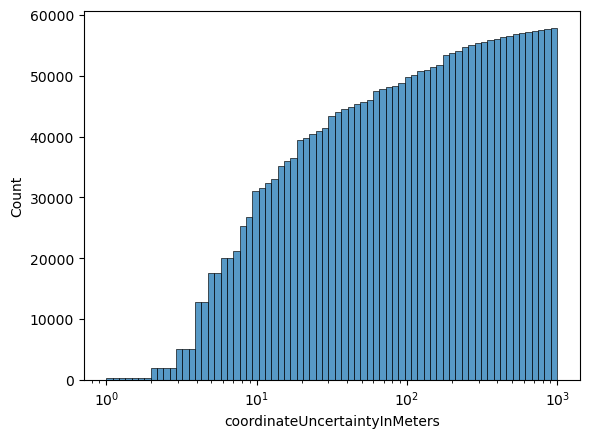

In [86]:
sns.histplot( df, x = 'coordinateUncertaintyInMeters', log_scale= True, cumulative=True)

In [87]:
q3 = df['coordinateUncertaintyInMeters'].quantile(0.90)
print(q3)

178.0
